In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(color_codes=True)
import numpy as np
color = sns.color_palette("tab10")

In [5]:
df_red = pd.read_csv("../data/wine_final_white_todo.csv")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo_calidad,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Buena,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Buena,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Buena,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Buena,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Buena,white


In [6]:
white_analysis = pd.DataFrame(data=df_red, 
                            columns = ['alcohol', 'density', 'chlorides','total sulfur dioxide','volatile acidity' ,'residual sugar','quality','tipo_calidad'])
white_analysis.head(10)

,alcohol,density,chlorides,total sulfur dioxide,volatile acidity,residual sugar,quality,tipo_calidad
0,8.8,1.0010,0.045,170.0,0.27,20.7,6,Buena
1,9.5,0.9940,0.049,132.0,0.30,1.6,6,Buena
2,10.1,0.9951,0.050,97.0,0.28,6.9,6,Buena
3,9.9,0.9956,0.058,186.0,0.23,8.5,6,Buena
4,9.9,0.9956,0.058,186.0,0.23,8.5,6,Buena
5,10.1,0.9951,0.050,97.0,0.28,6.9,6,Buena
6,9.6,0.9949,0.045,136.0,0.32,7.0,6,Buena
7,8.8,1.0010,0.045,170.0,0.27,20.7,6,Buena
8,9.5,0.9940,0.049,132.0,0.30,1.6,6,Buena
9,11.0,0.9938,0.044,129.0,0.22,1.5,6,Buena


Figure 8: Correlación usando el mapa de calor de Seaborn


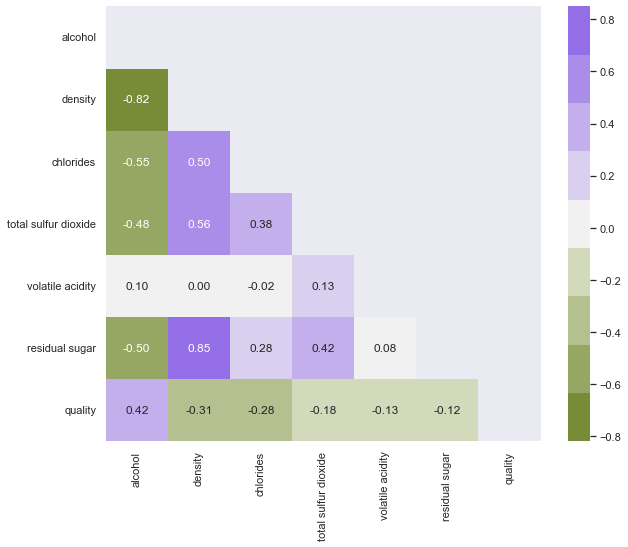

In [7]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
sns.set_context("notebook", font_scale= 1.0)
column = white_analysis.columns.tolist()
mcorr = white_analysis[column].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap=sns.diverging_palette(100, 275, s=80, l=55, n=9)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("Figure 8: Correlación usando el mapa de calor de Seaborn")

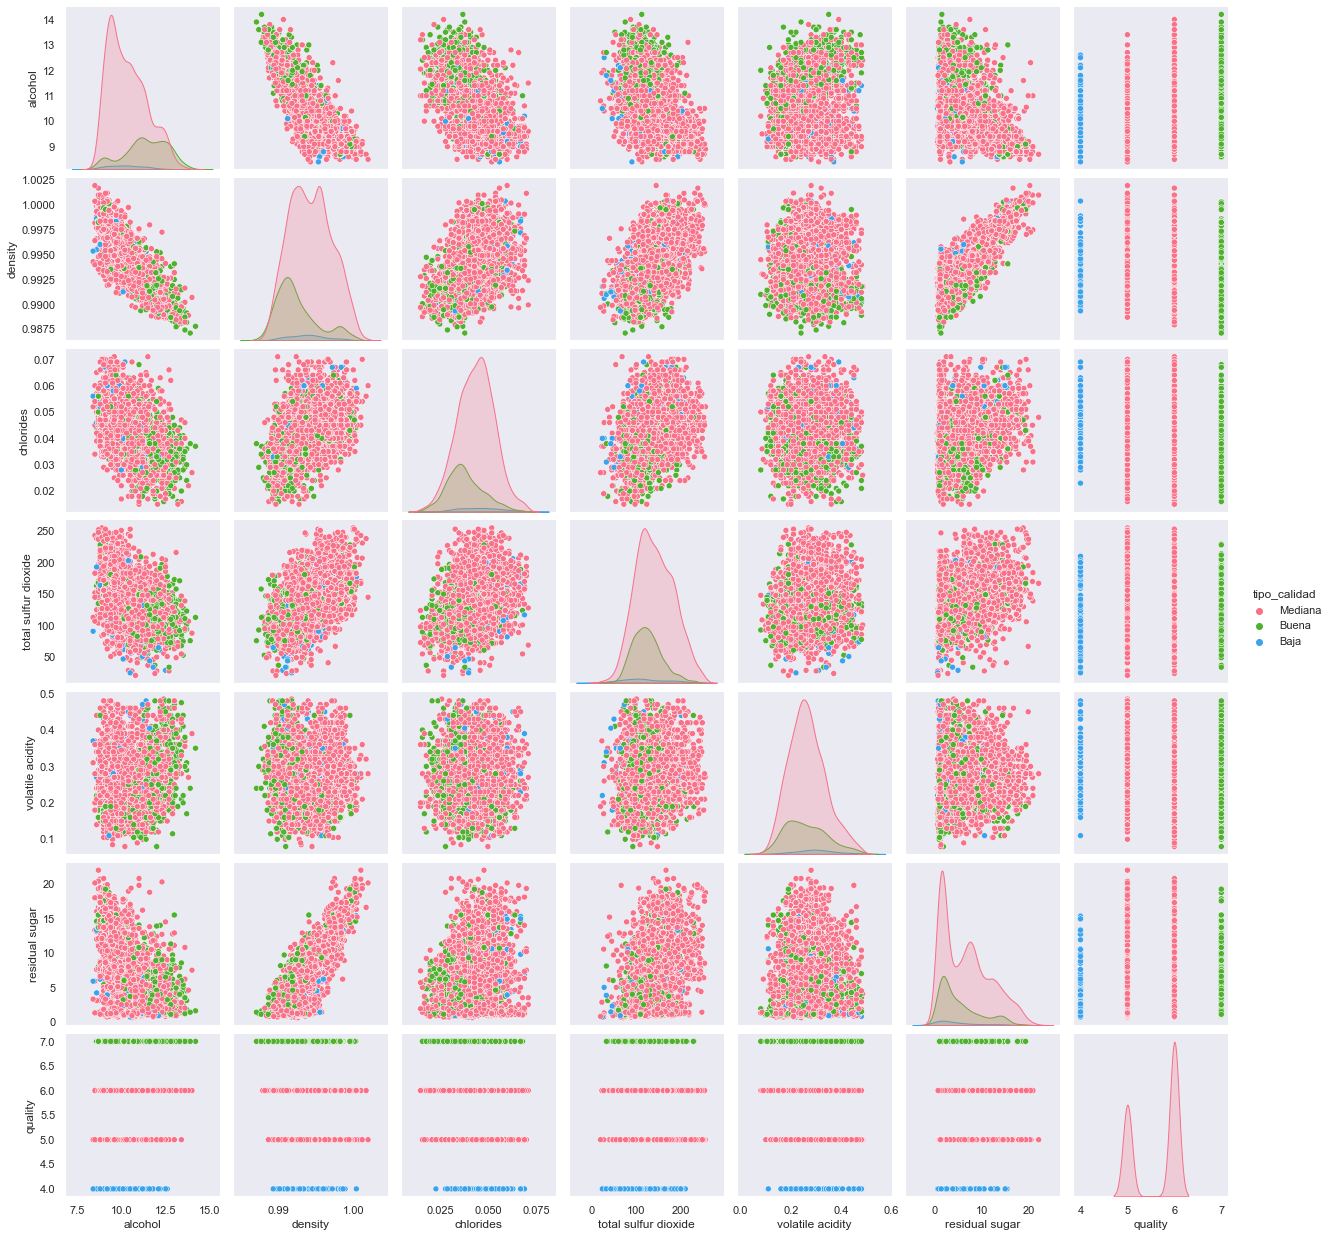

In [5]:
sns.pairplot(white_analysis, hue='tipo_calidad',palette="husl") 
plt.show()

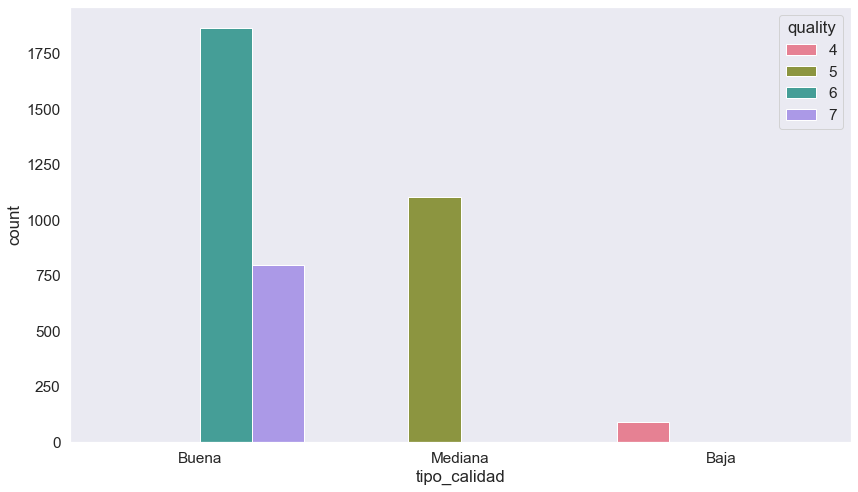

In [8]:
figure = plt.figure(figsize = (14,8))
sns.set_context("notebook", font_scale= 1.4)
sns.countplot(x="tipo_calidad",hue = 'quality', palette="husl",data=white_analysis)
plt.show()

In [9]:
#las calidades más representadas son los vinos de calidad 4,5,6 y 7
calidad_4 = pd.DataFrame(data=white_analysis[white_analysis.quality==4], 
                     columns=['density', 'residual sugar'])
calidad_5 = pd.DataFrame(data=white_analysis[white_analysis.quality==5], 
                     columns=['density', 'residual sugar'])
calidad_6= pd.DataFrame(data=white_analysis[white_analysis.quality==6], 
                     columns=['density', 'residual sugar'])
calidad_7 = pd.DataFrame(data=white_analysis[white_analysis.quality==7], 
                     columns=['density', 'residual sugar'])

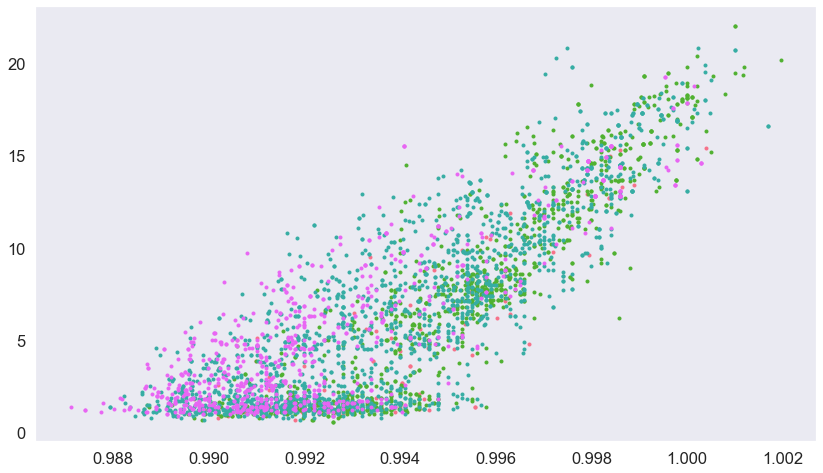

In [14]:
#Se graficarán las 4 calidades para ver qué tan separadas están
figure = plt.figure(figsize = (14,8))
sns.set_context("notebook", font_scale= 1.5)
colores = sns.color_palette(palette='husl', n_colors=6, desat=None)#obtener los colores usados anteriormente
plt.plot(calidad_4['density'],calidad_4['residual sugar'], '.', color = colores[0], label='4')
plt.plot(calidad_5['density'],calidad_5['residual sugar'], '.', color = colores[2], label='5')
plt.plot(calidad_6['density'],calidad_6['residual sugar'], '.', color = colores[3], label='6')
plt.plot(calidad_7['density'],calidad_7['residual sugar'], '.', color = colores[5], label='7')
plt.show()

In [15]:
def minimos_cuadrados(x,y):  
    m = len(x) #len() mide el largo del vector
    sumax = np.sum(x)
    sumay = np.sum(y)
    sumax2 = np.sum(x**2) # cada termino al cuadrado se suma
    sumaxy = np.dot(x,y) # producto punto entre x e y
    a = (m*sumaxy - sumax*sumay) / (m*sumax2 - sumax**2)
    b = (sumax2*sumay - sumaxy*sumax) / (m*sumax2 - sumax**2)
    return a,b

In [16]:
#obtener el ajuste de mínimos cuadrados para los 4 conjuntos de datos
a4,b4 = minimos_cuadrados(calidad_4['density'],calidad_4['residual sugar'])
a5,b5 = minimos_cuadrados(calidad_5['density'],calidad_5['residual sugar'])
a6,b6 = minimos_cuadrados(calidad_6['density'],calidad_6['residual sugar'])
a7,b7 = minimos_cuadrados(calidad_7['density'],calidad_7['residual sugar'])

x = np.linspace(0.986,1.004)
y4 = a4*x + b4 
y5 = a5*x + b5 
y6 = a6*x + b6
y7 = a7*x + b7

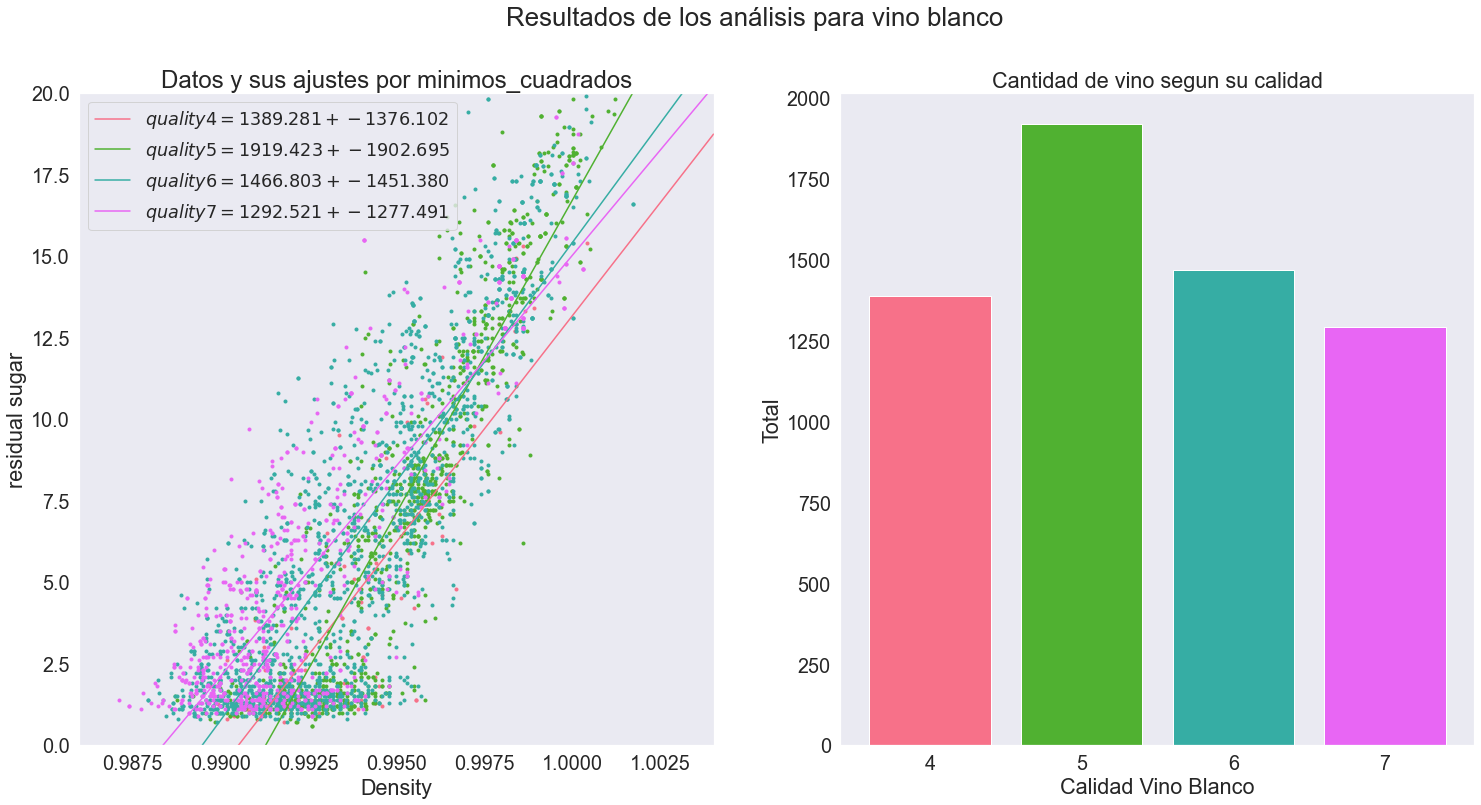

In [22]:
plt.figure(figsize=(25,12))#figura de tamaño 15x5
plt.suptitle("Resultados de los análisis para vino blanco")#titulo general
plt.subplot(121) #figura con 2 gráficos. 1º gráfico

#graficar las nubes de puntos
sns.set_context("notebook", font_scale= 2.0)
plt.title('Datos y sus ajustes por minimos_cuadrados')
plt.plot(calidad_4['density'],calidad_4['residual sugar'], '.', color = colores[0], label='')
plt.plot(calidad_5['density'],calidad_5['residual sugar'], '.', color = colores[2], label='')
plt.plot(calidad_6['density'],calidad_6['residual sugar'], '.', color = colores[3],label='')
plt.plot(calidad_7['density'],calidad_7['residual sugar'], '.', color = colores[5],label='')

#graficar los ajustes
sns.set_context("notebook", font_scale= 1.6)
plt.plot(x,y4, '-', color = colores[0],label='$quality4 = %0.3f + %0.3f  $'%(a4,b4))
plt.plot(x,y5, '-', color = colores[2],label='$quality5 = %0.3f + %0.3f  $'%(a5,b5))
plt.plot(x,y6, '-', color = colores[3],label='$quality6 = %0.3f + %0.3f  $'%(a6,b6))
plt.plot(x,y7, '-', color = colores[5],label='$quality7 = %0.3f + %0.3f  $'%(a7,b7))
plt.xlabel('Density')#etiquetar correctamente los gráficos
plt.ylabel('residual sugar')
plt.legend() #agregar leyenda al gráfico
plt.xlim(0.986,1.004)#ordenar el rango a mostrar
plt.ylim(0,20)

sns.set_context("notebook", font_scale=1.8)#2º gráfico
plt.subplot(122)
plt.title('Cantidad de vino segun su calidad')
plt.bar([4,5,6,7], [a4,a5,a6,a7], color = [colores[0],colores[2], colores[3], colores[5]])
plt.xlabel('Calidad Vino Blanco')
plt.ylabel('Total')
plt.xticks([4,5,6,7])
plt.show()

In [20]:
white_analysis.to_csv('../data/more_analytic_white_red.csv', index = False)

In [21]:
white_analysis

,alcohol,density,chlorides,total sulfur dioxide,volatile acidity,residual sugar,quality,tipo_calidad
0,8.8,1.00100,0.045,170.0,0.27,20.7,6,Buena
1,9.5,0.99400,0.049,132.0,0.30,1.6,6,Buena
2,10.1,0.99510,0.050,97.0,0.28,6.9,6,Buena
3,9.9,0.99560,0.058,186.0,0.23,8.5,6,Buena
4,9.9,0.99560,0.058,186.0,0.23,8.5,6,Buena
...,...,...,...,...,...,...,...,...
3853,11.2,0.99114,0.039,92.0,0.21,1.6,6,Buena
3854,9.6,0.99490,0.047,168.0,0.32,8.0,5,Mediana
3855,9.4,0.99254,0.041,111.0,0.24,1.2,6,Buena
3856,12.8,0.98869,0.022,110.0,0.29,1.1,7,Buena
